# Investigating revenues generated from movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue. 

**Questions**
   - How has revenue changed over the years
   - What was the most popular movie since 1960, in the 21st century and before the 21st century
   - What is the most voted movies since 1960, in the 21st century and before the 21st century
   - Which movie generated the most revenue since 1960, in the 21st century and before the 21st century
   - Which movie had the highest budget allocation since 1960, in the 21st century and before the 21st century
   - What is the highhest rated (vote_average) movies since 1960, in the 21st century and before the 21st century
   - Is the most voted movie and most popular movie highest revenue generating movie?
   - What are the most popular genre since 1960
   - Which genres have gained more populariy over the years
   - Which genres have the highest revenue
   - Which genres are most likely to generate high revenues
   - How much has been budgeted for each genres over the years
   - Is there a relationship between popularity and revenue
   - Is there a relationship between Budget and revenue
   - Is there a relationship between Number of Votes and revenue
   - What other factors are likely to affect revenue
   - How much revenue was generated by each Production Company
   - How much was budgeted by different Production companies for Movies
   - What are the most popular production companies
   - What are the most voted production companies
   - What are the most rated production companies
   - Which Production companies are most likely to generated more revenues over the years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

<a id='wrangling'></a>
## Data Wrangling



### Loading the dataset

In [2]:
movies = pd.read_csv("tmdb-movies.csv")

In [3]:
movies.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08

In [4]:
# Getting the detailed summary of data
import pandas_profiling
movies.profile_report(title='Movies Data - Report', progress_bar=False)

95% of the movies have a popularity score less than 2.05 and the distribution of Popularity score is skewed to the right. The budget has 52.4% values of Zeros. But budget allocated cannot be zero. Hence, we will consider zeros for budget as missing values. These zeros skewed the Budget to the right.  We also Budget less than a 100. 55.4% of Revenue, the variable of interest are zeros. But revenue generated cannot be zero. Hence, we will consider zeros for revenue as missing values.The seros skewed the budget to the right. zeros (31, 0.3%) for runtime are also considered as missing values, since runtime cannot be zero. 95% of movies (1960 - 2015) have a run time less than 139 minutes. The runtime is skewed to the right due to outliers on the higher end of the runtime. 75% of the movies have a vote count below 146

### Dropping duplicated rows

In [5]:
# Checking for duplicated rows
movies.duplicated().sum()

1

In [6]:
# Checking for duplicated along the imdb_id. since each movies has a unique imdb id
movies.duplicated(subset = "imdb_id").sum()

10

In [7]:
# Checking for duplicated movie titles # Movies
movies.duplicated(subset = "original_title").sum()


295

Movies can have the same title hence only the title cannot tell if its a duplicate entry

In [8]:
# Checking for duplicated movie titles # Movies
movies.duplicated(subset = "cast").sum()


146

Movies can have the same cast hence only the cast cannot tell if its a duplicate entry

### Checking for nulls

In [9]:
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The number of nulls for imdb_id is the same as the number of duplicated imdb_id. Which implies, the "duplicated" imdb_id werre actually null values. 

In [10]:
# drop the rows with missing data for imdb_id
movies.dropna(subset=["imdb_id"], inplace = True)

# Selecting movies with values for revenue greater than 1000
movies = movies.query("revenue_adj > 1000")

# Selecting movies with values for Budget greater than 1000
movies = movies.query("budget_adj > 1000")

# Selecting movies with values for Runtime greater than 0
movies = movies.query("runtime > 0")

Assumed a minimum of 1000 is budgeted for a movies and a minimum of 1000 is generated by a movie

### DROPPING COLUMNS THAT ARE NOT NEEDED
They include overview, tagline, homepage, Budget and revenue since the adjusted budget and revenue will be used

In [11]:
# Dropping unwanted columns
movies.drop(["id","overview", "tagline", "homepage", "budget", "revenue"], axis = "columns", inplace = True)

In [12]:
movies = movies.query("revenue_adj > 1000")

### MANIPULATING THE GENRES, CAST, KEYWORDS, AND PRODUCTION COMPANIES COLUMNS
The genres, cast, keywords and production companies of a movie are separeted by "|". 

In [13]:
movies.genres = movies.genres.str.split("|")

In [14]:
movies.cast = movies.cast.str.split("|")

In [15]:
movies.keywords = movies.keywords.str.split("|")

In [16]:
movies.production_companies = movies.production_companies.str.split("|")

<a id='eda'></a>
## Exploratory Data Analysis

In [17]:
# Defining a function that plots the Kde and box plot of a variable
def distribution_plots(variable, hue = None):
    fig, ax = plt.subplots(1,2, figsize=(15,4))
    sns.kdeplot(data=movies, x=variable, ax = ax[0], hue= hue)
    sns.boxplot(data=movies, x=variable, ax = ax[1], hue =hue)
    plt.show()
    plt.clf()

In [18]:
#Defining a function that groups the movies into 3 categories, High, Low and Medium revenue Movies.
def movie_revenue(revenue):
    if revenue <= movies.revenue_adj.quantile(0.33):
        return "Low"
    elif revenue > movies.revenue_adj.quantile(0.33) and revenue <= movies.revenue_adj.quantile(0.67):
        return "Medium"
    else:
        return "High"

Creating a function that groups the movies into three categories. Movies that generated revenue less than or equal to the 33 percentile of the revenue are "Low" revenue generating movies, those that generated revenue greater than the 33 percentile but less than or equal to the 67th percentile are "Medium" revenue generating movies, Movies with revenue greater than the 67th percentile of the revenue are grouped as "High" revenue generating movies

In [19]:
# Creating a column that specifies the group a movie belongs to based its revenue generated
movies["Revenue_category"] = movies.revenue_adj.apply(movie_revenue)

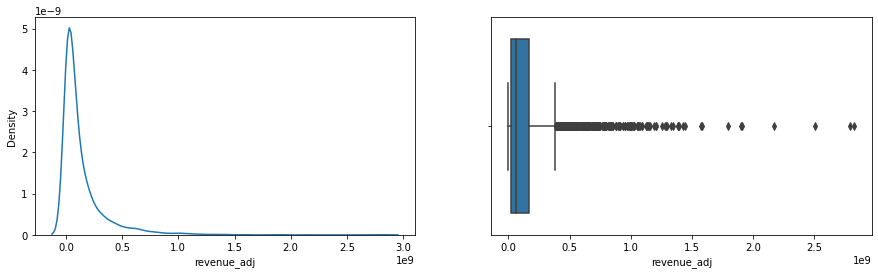

<Figure size 432x288 with 0 Axes>

In [20]:
distribution_plots("revenue_adj")

The revenue is skewed to the right and not normally distributed. It has outliers at the heavier of its distribution. 75% of the  revenue are less than 165000000. 

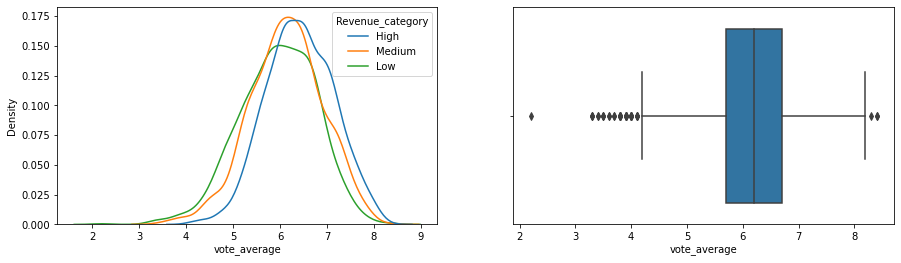

<Figure size 432x288 with 0 Axes>

In [21]:
distribution_plots("vote_average", "Revenue_category")

The vote average is skewed to the left, 75% of the movies have a an average rating aboue 5.7, Lower values of average vote are identified as outliers. The Low and medium revenue generating movies have lower values of vote average

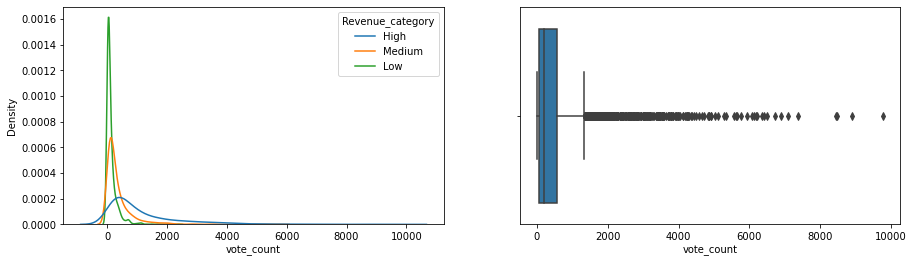

<Figure size 432x288 with 0 Axes>

In [22]:
distribution_plots("vote_count", "Revenue_category")

The vote count is skewed to the right, 75% of the movies have a vote counts below 583, Higer values of vote counts are identified as outliers. The Low and medium revenue generating movies have lower values of vote average and less variability in thier vote counts. 75% of low revenue generating movies have vote count less than 154, while 75% of Medium revenue generating movies have vote count less than 415. 60% of the High revenue generating movies have vote count greater than 505

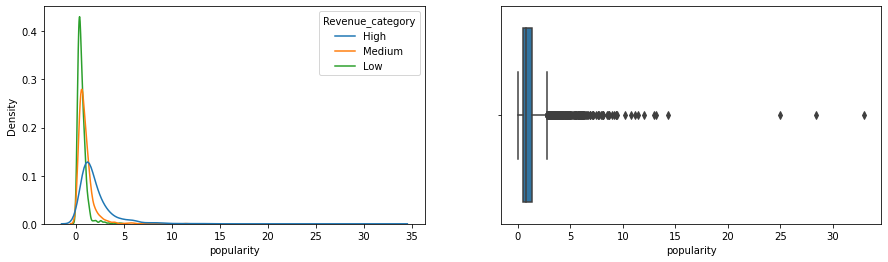

<Figure size 432x288 with 0 Axes>

In [23]:
distribution_plots("popularity", "Revenue_category")

The popularity is skewed to the right, 75% of the movies have a popularity below 1.39, Higer values of popularity are identified as outliers. The Low and medium revenue generating movies have lower values of popularity and less variability in thier popularity. 95% of low revenue generating movies have popularity less than 1.31, while 75% of Medium revenue generating movies have popularity less than 1.18. 50% of the High revenue generating movies have popularity greater than 1.49. There are three outsanding outliers

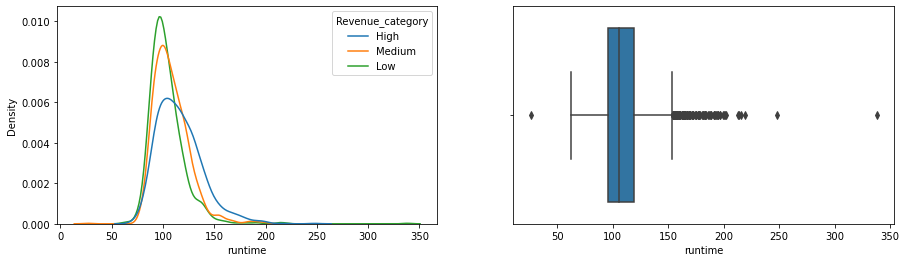

<Figure size 432x288 with 0 Axes>

In [24]:
distribution_plots("runtime", "Revenue_category")

The runtime is skewed to the right, 75% of the movies have a runtime below 120, Higer values of runtime are identified as outliers, with one outstanding outlier with runtime below 50. The Low and medium revenue generating movies have lower values of runtime and less variability in thier runtime. 75% of low revenue generating movies have runtime less than 111, while 75% of Medium revenue generating movies have runtime less than 118. 40% of the High revenue generating movies have runtime greater than 118. There are three outsanding outliers

In [25]:
# Saving the release years of movies to a list
Release_Years = sorted(list(movies.release_year.unique()))

In [26]:
# creating a function that can extract the genre, production company or the casts of a  movie and aggregates the movies
def accumulation_by_genre_and_year(j, attribute = "genres", year= None, accum="Total"):
    if year == None:
        movies_year = movies.copy()
        year = "Total"
    else:
        movies_year = movies[movies["release_year"]==year]
    
    Genres = {}
    i = 0
    for genres in movies_year[attribute]:
        if type(genres) is list:
            for genre in genres:
                if genre in Genres:
                    Genres[genre] = Genres[genre] + 1
                else:
                    Genres[genre] = 0
                    
    Genre_average_popularity = {}
    for Genre in list(Genres):
        i = 0
        Genre_average_popularity[Genre] = 0
        for genres in movies_year[attribute]:
            if type(genres) is list:
                if Genre in genres:
                    Genre_average_popularity[Genre] = Genre_average_popularity[Genre] + movies_year.iloc[i,j]
            i +=1
        if accum == "avg":
            if year == None or year == "Total":
                year = "Average"
            Genre_average_popularity[Genre] = Genre_average_popularity[Genre]/ Genres[Genre]
    Genre_average_popularity = pd.DataFrame(Genre_average_popularity, index=[year])
    Genre_average_popularity = Genre_average_popularity.T
    Genre_average_popularity.columns = [year]
    Genre_average_popularity = Genre_average_popularity.sort_values(year, ascending = False)
    return Genre_average_popularity

The function above extracts the genre, production company or the casts of a  movie, aggrates the movies based on the revenue, budget, popularity, vote count, or vote average of a genres, production company or cast, for a particular year or returns the total or average for all the years 

In [27]:
# Defining a function that accumulates or aggregates data from 1960-2015
def Genre_1960_2020(parameter, attribute="genres"):    
    Revenue_1960 = accumulation_by_genre_and_year(parameter,attribute= attribute, year=1960)
    for year in Release_Years[1:]:
        _year = accumulation_by_genre_and_year(parameter,attribute = attribute, year= year)
        Revenue_1960 =pd.concat([Revenue_1960,_year], axis=1)

    Revenue_1960.replace([np.inf, -np.inf], np.nan, inplace = True)
    Revenue_1960.fillna(0, inplace = True)
    return Revenue_1960

Defining a function that accumulates or aggregates data from 1960-2015

In [28]:
# Defining a function that plots a line plot from 1960-2015 of each genres with respect a value
def genre_plot(_1960, variable):
    fig,ax = plt.subplots(2,2, figsize = (24,12), sharex=True,sharey=True,)
    sns.lineplot(data=_1960.T.iloc[:,:5], ax= ax[0,0])
    sns.lineplot(data=_1960.T.iloc[:,5:10], ax= ax[0,1])
    sns.lineplot(data=_1960.T.iloc[:,10:15], ax= ax[1,0])
    sns.lineplot(data=_1960.T.iloc[:,15:], ax= ax[1,1])
    ax[0,0].set(xlabel = "Years", ylabel = variable)
    ax[0,1].set(xlabel = "Years", ylabel = variable)
    ax[1,0].set(xlabel = "Years", ylabel = variable)
    ax[1,1].set(xlabel = "Years", ylabel = variable)
    plt.show()
    plt.clf()

Defining a function that plots a line plot from 1960-2015 of each genres with respect a value

### How has revenue changed over the years
Revenue generated by movies have been **increasing** over years and **peaked in 2015**

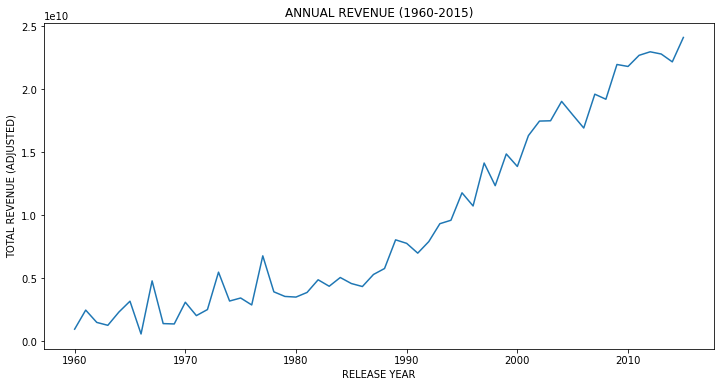

<Figure size 432x288 with 0 Axes>

In [29]:
# Aggregating the movies by release year and summing up the revenue generated for each year
Annual_Revenue = movies.groupby("release_year").agg({"revenue_adj":"sum"})

# PLotting the Annual revenue generated by the year
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data=Annual_Revenue,x=Annual_Revenue.index, y="revenue_adj", ax= ax)
ax.set_title("ANNUAL REVENUE (1960-2015)")
ax.set_xlabel("RELEASE YEAR")
ax.set_ylabel("TOTAL REVENUE (ADJUSTED)")
plt.show()
plt.clf()

### What was the most popular movie since 1960, in the 21st century and before the 21st century

    The most popular movie since 1960 is Jurassic World
    The most popular movie in the 20th century is Star Wars
    The most popular movie since 21st century is Jurassic World

**The genres of both movies include Adventure, Action, Science Fiction**

In [30]:
# Defing a function that return the maximum values of a series
def max_popularity(popularity):
    return popularity.max()

# definig a function that determines the movie with highest value for a variable
def Highest_movie(variable, print_word):
    # What is the most popular movie since 1960:
    Most_voted_movie_1960_2015 = movies[movies[variable]== max_popularity(movies[variable])].iloc[:,2].values[0]

    # What is the most popular movie before the 21st century:
    movies_20th_century = movies.query("release_year < 2001")
    Most_voted_movie_20th_century = movies_20th_century[movies_20th_century[variable]== max_popularity(movies_20th_century[variable])].iloc[:,2].values[0]

    # What is the most popular movie since the 21st century:
    movies_21st_century = movies.query("release_year >= 2001")
    Most_voted_movie_21st_century = movies_21st_century[movies_21st_century[variable]== max_popularity(movies_21st_century[variable])].iloc[:,2].values[0]


    print(f"The most {print_word} movie since 1960 is {Most_voted_movie_1960_2015}")
    print(f"The most {print_word} in the 20th century is {Most_voted_movie_20th_century}")
    print(f"The most {print_word} since 21st century is {Most_voted_movie_21st_century}")

Highest_movie("popularity", "popular")

The most popular movie since 1960 is Jurassic World
The most popular in the 20th century is Star Wars
The most popular since 21st century is Jurassic World


In [31]:
movies.head(1)

imdb_id  popularity  original_title  \
0  tt0369610   32.985763  Jurassic World   

                                                cast         director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...  Colin Trevorrow   

                                            keywords  runtime  \
0  [monster, dna, tyrannosaurus rex, velociraptor...      124   

                                           genres  \
0  [Action, Adventure, Science Fiction, Thriller]   

                                production_companies release_date  vote_count  \
0  [Universal Studios, Amblin Entertainment, Lege...       6/9/15        5562   

   vote_average  release_year    budget_adj   revenue_adj Revenue_category  
0           6.5          2015  1.379999e+08  1.392446e+09             High

### What is the most voted movies since 1960, in the 21st century and before the 21st century
    The most voted movie since 1960 is Inception
    The most voted in the 20th century is The Matrix
    The most voted since 21st century is Inception

In [32]:
Highest_movie("vote_count", "voted")

The most voted movie since 1960 is Inception
The most voted in the 20th century is The Matrix
The most voted since 21st century is Inception


### Which movie generated the most revenue since 1960, in the 21st century and before the 21st century

    The most revenue generating movie since 1960 is Avatar
    The most revenue generating in the 20th century is Star Wars
    The most revenue generating since 21st century is Avatar

In [33]:
Highest_movie("revenue_adj", "revenue generating")

The most revenue generating movie since 1960 is Avatar
The most revenue generating in the 20th century is Star Wars
The most revenue generating since 21st century is Avatar


### Which movie had the highest budget allocation since 1960, in the 21st century and before the 21st century
    The most budget allocation movie since 1960 is The Warrior's Way
    The most budget allocation in the 20th century is Titanic
    The most budget allocation since 21st century is The Warrior's Way

In [34]:
Highest_movie("budget_adj", "budget allocation")

The most budget allocation movie since 1960 is The Warrior's Way
The most budget allocation in the 20th century is Titanic
The most budget allocation since 21st century is The Warrior's Way


### What is the highest rated (vote_average) movies since 1960, in the 21st century and before the 21st century
    The most rated movie since 1960 is The Shawshank Redemption
    The most rated in the 20th century is The Shawshank Redemption
    The most rated since 21st century is Whiplash

In [35]:
Highest_movie("vote_average", "rated")

The most rated movie since 1960 is The Shawshank Redemption
The most rated in the 20th century is The Shawshank Redemption
The most rated since 21st century is Whiplash


### Are the most voted movie, most budgeted, most rated and most popular movies the  highest revenue generating movies?

#### All time (1960-2015)
Taking all the movies(1060-2015) into account, No they are not. Neither of most voted, most popular, most budgeted or most rated movies is The highest revenue generating movie. with the exception of most rated movie, the other have movies have Action and adventure commomg amomg vall of them. Other most commom genres for these movies include Science Fiction and Thriller.    
The movies include

    The most revenue generating movie since 1960 is Avatar
    The most voted movie since 1960 is Inception
    The most popular movie since 1960 is Jurassic World
    The most budget allocation movie since 1960 is The Warrior's Way
    The most rated movie since 1960 is The Shawshank Redemption

#### 20th Century (1960-2000)
For movies released in the 20th century, The most popular movie generated the highest revenue. Action, Science fiction, Drama and Thriller are the most common genres for these movies.

    The most revenue generating in the 20th century is Star Wars
    The most voted in the 20th century is The Matrix
    The most popular movie in the 20th century is Star Wars
    The most budget allocation in the 20th century is Titanic
    The most rated in the 20th century is The Shawshank Redemption

#### 21st  Century (2001- 2015)
For movies released since the start of the 21st century, Neither of most voted, most popular, most budgeted or most rated movies is The highest revenue generating movie. with the exception of most rated movie, the other have movies have Action and adventure commomg amomg all of them. Other most commom genres for these movies include Science Fiction, Fantasy and Thriller. 

    The most revenue generating since 21st century is Avatar
    The most voted since 21st century is Inception
    The most popular movie since 21st century is Jurassic World
    The most budget allocation since 21st century is The Warrior's Way
    The most rated since 21st century is Whiplash

The most rated genres for both peroids (20th and 21st century is DRAMA!)

In [36]:
# What is the most popular movie since 1960:
Most_popular_movie_1960_2015 = movies[movies["vote_average"]== max_popularity(movies["vote_average"])].iloc[:,7].values

# What is the most popular movie before the 21st century:
movies_20th_century = movies.query("release_year < 2001")
Most_popular_movie_20th_century = movies_20th_century[movies_20th_century["vote_average"]== max_popularity(movies_20th_century["vote_average"])].iloc[:,7].values

# What is the most popular movie since the 21st century:
movies_21st_century = movies.query("release_year >= 2001")
Most_popular_movie_21st_century = movies_21st_century[movies_21st_century["vote_average"]== max_popularity(movies_21st_century["vote_average"])].iloc[:,7].values


print(f"The most popular movie since 1960 is {Most_popular_movie_1960_2015}")
print(f"The most popular movie in the 20th century is {Most_popular_movie_20th_century}")
print(f"The most popular movie since 21st century is {Most_popular_movie_21st_century}")



The most popular movie since 1960 is [list(['Drama', 'Crime']) list(['Documentary', 'Music'])]
The most popular movie in the 20th century is [list(['Drama', 'Crime']) list(['Documentary', 'Music'])]
The most popular movie since 21st century is [list(['Drama', 'Music'])]


### What are the most popular genre since 1960

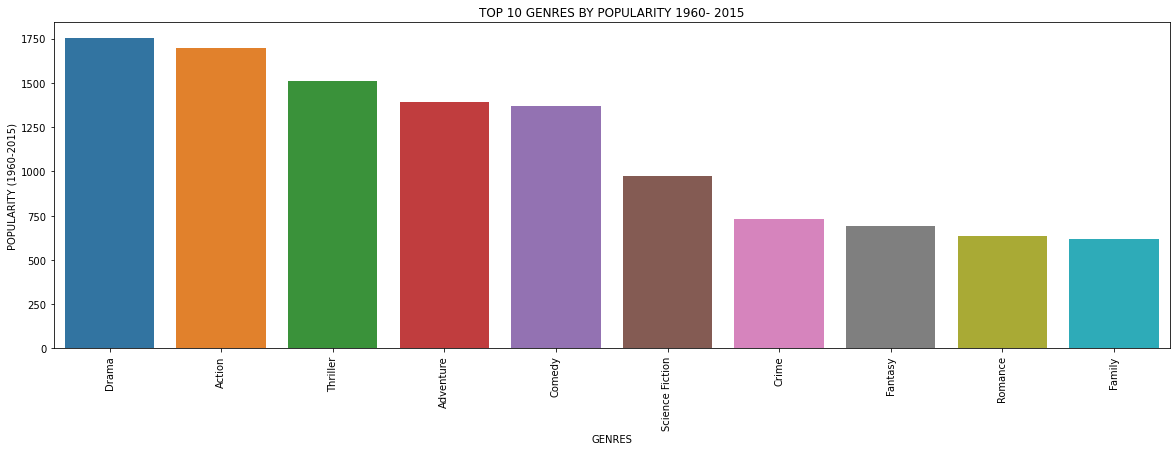

<Figure size 432x288 with 0 Axes>

In [37]:
# Aggregating the data by the genres of the movies and selecting the 10 most popular genres. 
Top_10_Genres_by_popularity = accumulation_by_genre_and_year(1).rename(columns={"Total":"Total Popularity (1960-2015)"}).iloc[:10]

# Making a bar plot of the 10 most popular genres
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_10_Genres_by_popularity, x=Top_10_Genres_by_popularity.index, y="Total Popularity (1960-2015)", ax= ax)
g.set_xticklabels(labels= list(Top_10_Genres_by_popularity.index),rotation = 90)
ax.set_title("TOP 10 GENRES BY POPULARITY 1960- 2015")
ax.set_xlabel("GENRES")
ax.set_ylabel("POPULARITY (1960-2015)")
plt.show()
plt.clf()

###  Which genres have gained more populariy over the years

While other genres have an increasing poularity, History, war, music and foreign have consistently being the most unpopular genres. From the late 90s the other genres have been gaining more popularity among viewers, Genres like,

     drama
     action
     Comedy
     Thriller
     Adventure
     Science fiction 

have become the most popular genres since the start of the 21st century. Since 2010, Thriller, drama, action, thriller, and science fiction experenced increased in popularity exponentially

In [38]:
Popularity_1960_2015 = Genre_1960_2020(1)

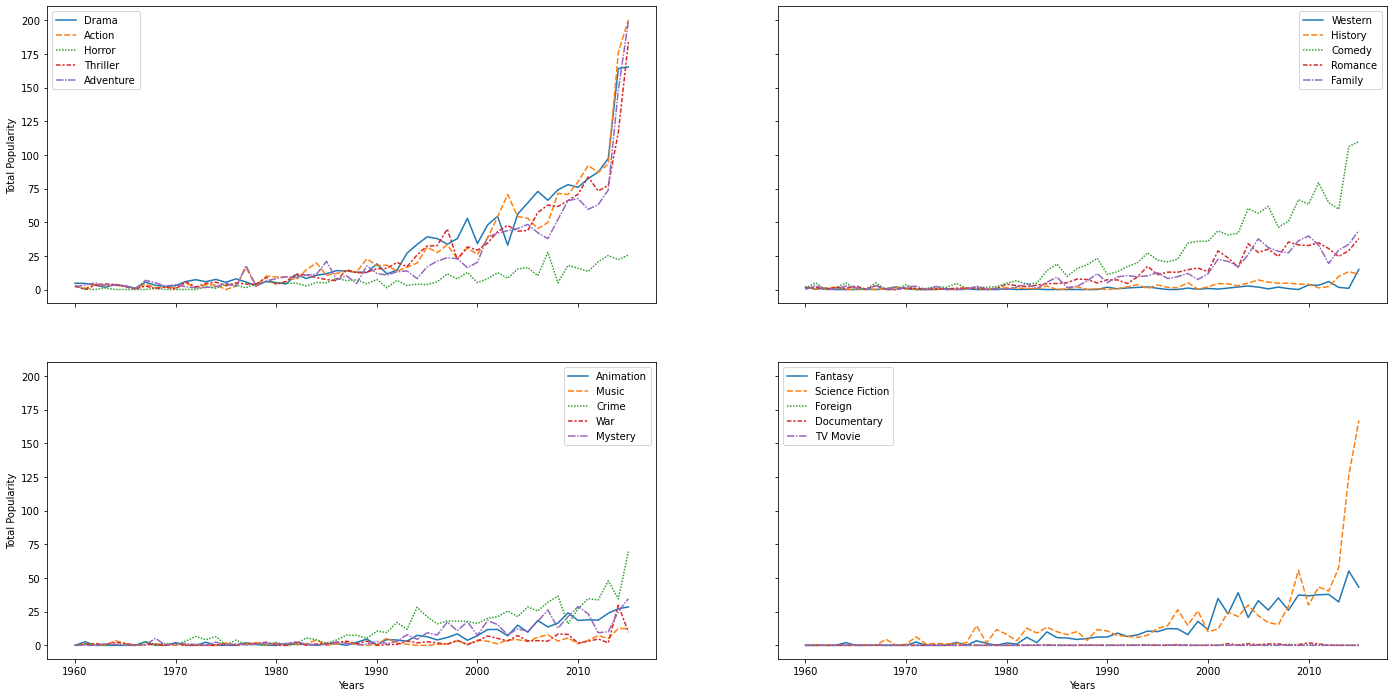

<Figure size 432x288 with 0 Axes>

In [39]:
genre_plot(Popularity_1960_2015, "Total Popularity")

### Which genres have the highest revenue
The Genres with the highest cummulative revenue are 
- Action
- Adventure
- Comedy
- Drama
- Thriller

In [40]:
accumulation_by_genre_and_year(-2).rename(columns={"Total":"Total Revenue (1960-2020)"}).head()

Total Revenue (1960-2020)
Action                  2.117679e+11
Adventure               2.030552e+11
Drama                   1.777766e+11
Comedy                  1.647210e+11
Thriller                1.543051e+11

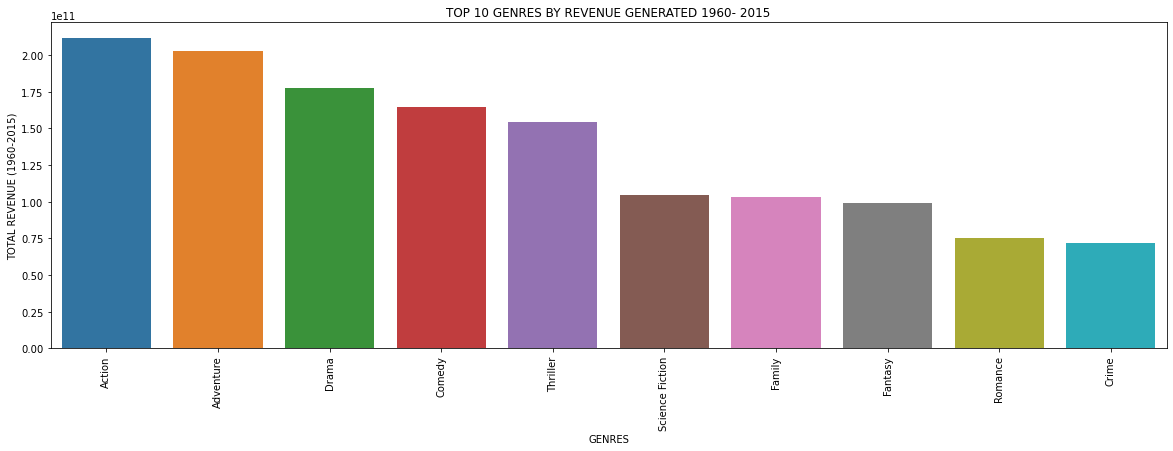

<Figure size 432x288 with 0 Axes>

In [41]:
# Aggregating the data by the genres of the movies and selecting the top 10 genres based on revenue generated. 
Top_10_Genres_by_adjusted_revenue = accumulation_by_genre_and_year(-2).rename(columns={"Total":"Total Revenue (1960-2020)"}).iloc[:10]

# Making a plot of the top 10 genres by revenue
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_10_Genres_by_adjusted_revenue, x=Top_10_Genres_by_adjusted_revenue.index, y="Total Revenue (1960-2020)", ax= ax)
g.set_xticklabels(labels= list(Top_10_Genres_by_adjusted_revenue.index),rotation = 90)
ax.set_title("TOP 10 GENRES BY REVENUE GENERATED 1960- 2015")
ax.set_xlabel("GENRES")
ax.set_ylabel("TOTAL REVENUE (1960-2015)")
plt.show()
plt.clf()

### Which genres are most likely to generate high revenues
Renenue genereated by genres like action, adventure, comedy, drama and family are have had an upward trend, unlike genres like Western, Foreign, history and war that generated rerlatively constant revenue over the years, with no sign of improvemet. fantasy and Science fiction generated less revenues from the 1960s to the early 1990s (though fantasy had a sharp increase in the late 1970s, the declined back), it experienced a surge from the early 1990s and has had their ups and downs since then. why is it to? Since the beginning of the 21st century, action, adventure, fantasy, science fiction, comdey and thriller have generaed an increasing revenue. Could this be as a result of technological advancement? does it have to do with their sharp increase in popularity? or is it because more budget has been allocated to these genres?

In [42]:
Revenue_1960 = Genre_1960_2020(-2)

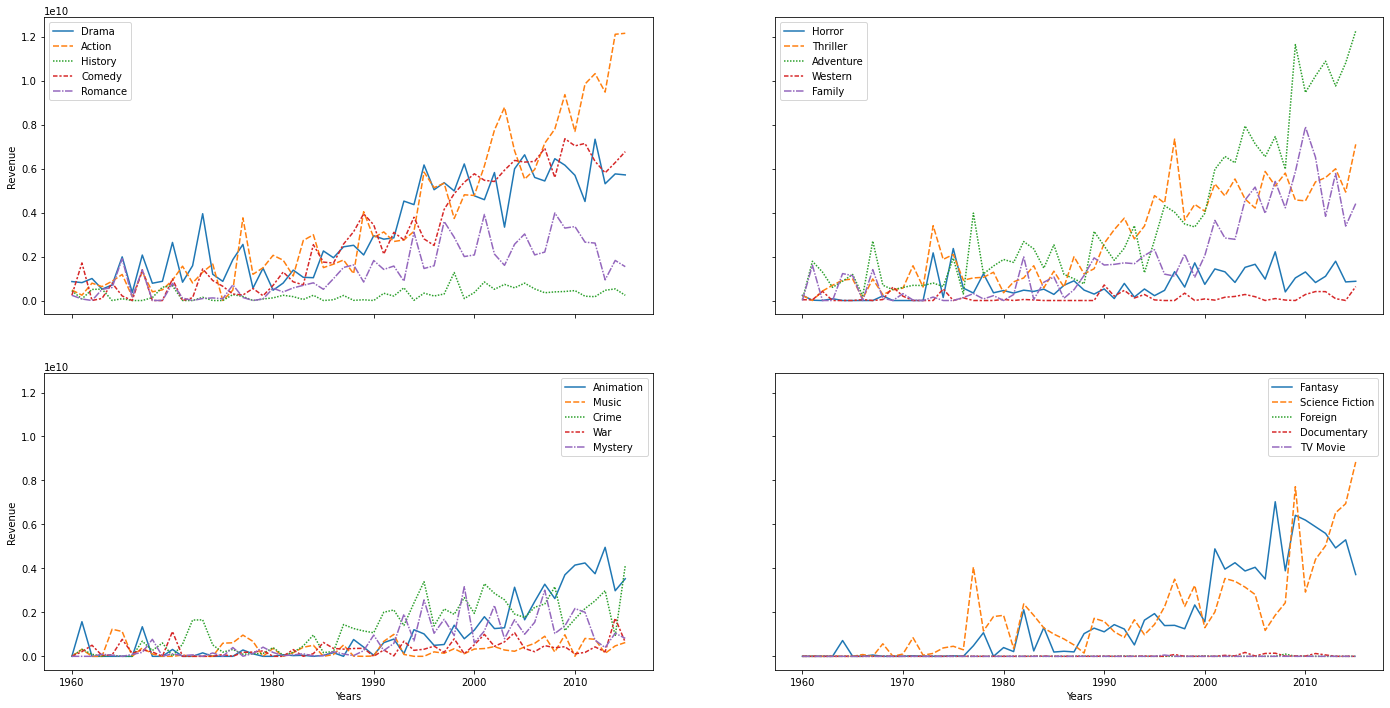

<Figure size 432x288 with 0 Axes>

In [43]:
genre_plot(Revenue_1960, "Revenue")

### How much has been budgeted for each genres over the years

In [44]:
Budget_by_Genre_1960_2020 = Genre_1960_2020(-3)

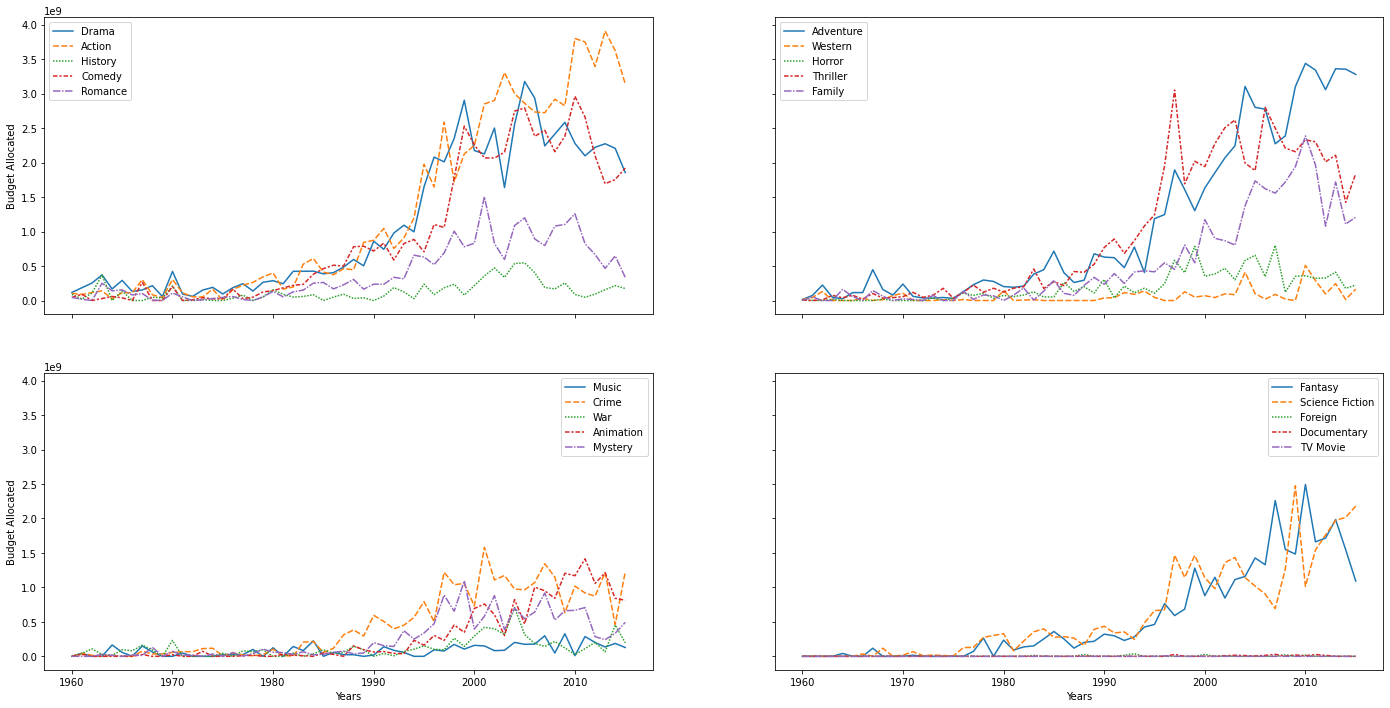

<Figure size 432x288 with 0 Axes>

In [45]:
genre_plot(Budget_by_Genre_1960_2020, "Budget Allocated")

### Is there a relationship between popularity and revenue
Poularity has a positve relationship as indicated by it correlation of 0.55 with revenue. It indictates that the more popular a movie is the higher its chances of generating of higher revenue. But NOTE, Correlation is not causation

 The correlation between Popularity and Revenue is 0.5459720635439025


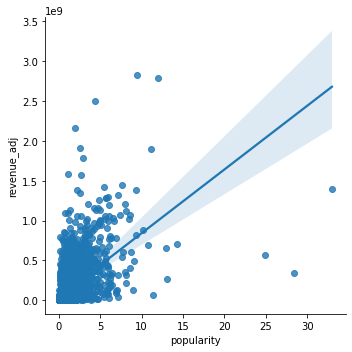

In [46]:
# Printing the correlation between popularity and revenue
print(f" The correlation between Popularity and Revenue is {movies.revenue_adj.corr(movies.popularity)}")

# Plotting a regression plot for Popularity and reveue
sns.lmplot(
    data=movies,
    x="popularity",
    y="revenue_adj")

### Is there a relationship between Budget and revenue
Budget has a strong positive relationship as indicated by it correlation of 0.57 with revenue. It indictates that the higher the budget of a movie is the higher its chances of generating of higher revenue. But NOTE, Correlation is not causation

 The correlation between Budget and Revenue is 0.5697584431835925


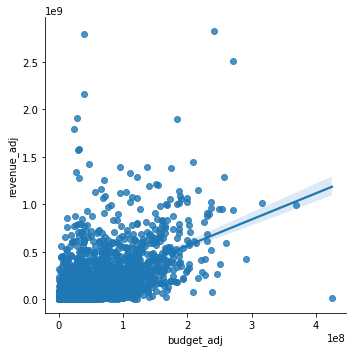

In [47]:
# Printing the correlation between budget and revenue
print(f" The correlation between Budget and Revenue is {movies.revenue_adj.corr(movies.budget_adj)}")

# Plotting a regression plot for Budget and reveue
sns.lmplot(
    data=movies,
    x="budget_adj",
    y="revenue_adj")

### Is there a relationship between Average  Rating and revenue
Average Ratings has a weak positive relationship as indicated by it correlation of 0.27 with revenue. 

 The correlation between Average ratings and Revenue is 0.26741211807521414


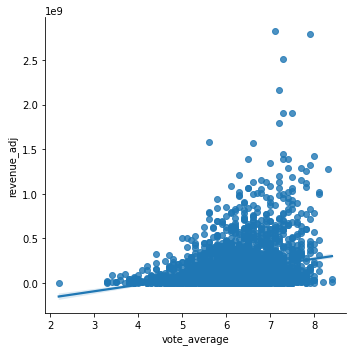

In [48]:
# Printing the correlation between Average vote and revenue
print(f" The correlation between Average ratings and Revenue is {movies.revenue_adj.corr(movies.vote_average)}")

# Plotting a regression plot for Budget and reveue
sns.lmplot(
    data=movies,
    x="vote_average",
    y="revenue_adj")

### What other factors are likely to affect revenue

These factors are more likely to affect the revenue generated by a movies (in descending order)
- Vote Count
- Budget
- Popularity
- The average vote (it has a weak correlation with revenue)
- Runtime (It has a weak correlation with revenue)

In [49]:
# Getting the correlation between Revenue and the other variables
movies.corr().iloc[-1].sort_values(ascending = False)

revenue_adj     1.000000
vote_count      0.654003
budget_adj      0.569758
popularity      0.545972
runtime         0.280517
vote_average    0.267412
release_year   -0.104381
Name: revenue_adj, dtype: float64

### How much revenue was generated by each Production Company

In [50]:
# Aggreating the revenues of movies by their production companies
Revenue_production_company_1960_2015 = accumulation_by_genre_and_year(-2, "production_companies")

In [51]:
Revenue_production_company_1960_2015.head()

Total
Warner Bros.                            6.696881e+10
Universal Pictures                      6.047437e+10
Paramount Pictures                      5.413069e+10
Twentieth Century Fox Film Corporation  5.037067e+10
Walt Disney Pictures                    3.667857e+10

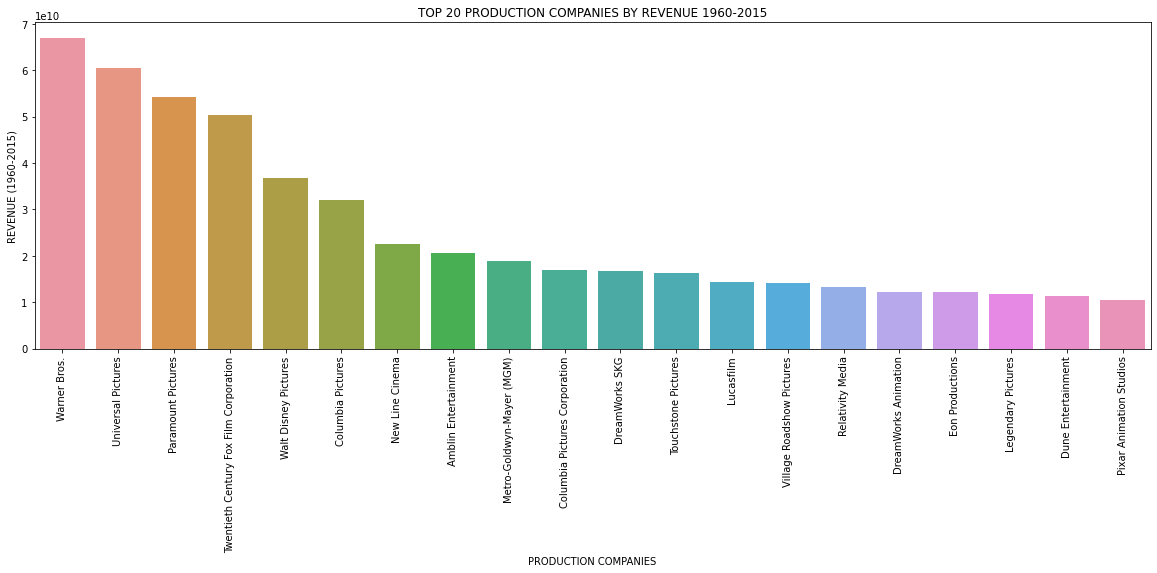

<Figure size 432x288 with 0 Axes>

In [53]:
#Selecting the top 20 companies based on revenue
Top_20_Companies_by_Revenue = Revenue_production_company_1960_2015.iloc[:20] 

# Plotting a bar plot for Top 20 companies based on revenue generated
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_20_Companies_by_Revenue, x=Top_20_Companies_by_Revenue.index,y=Top_20_Companies_by_Revenue.Total,  ax= ax)
g.set_xticklabels(labels= list(Top_20_Companies_by_Revenue.index),rotation = 90)
ax.set_title("TOP 20 PRODUCTION COMPANIES BY REVENUE 1960-2015")
ax.set_xlabel("PRODUCTION COMPANIES")
ax.set_ylabel("REVENUE (1960-2015)")
plt.show()
plt.clf()

### How much was budgeted by different Production companies for Movies

In [54]:
# Aggreating the budget of movies by their production companies
Budget_production_company_1960_2015 = accumulation_by_genre_and_year(-3, "production_companies")

In [55]:
Budget_production_company_1960_2015.head()

Total
Warner Bros.                            2.304582e+10
Universal Pictures                      1.786877e+10
Paramount Pictures                      1.593355e+10
Twentieth Century Fox Film Corporation  1.261877e+10
Columbia Pictures                       1.162562e+10

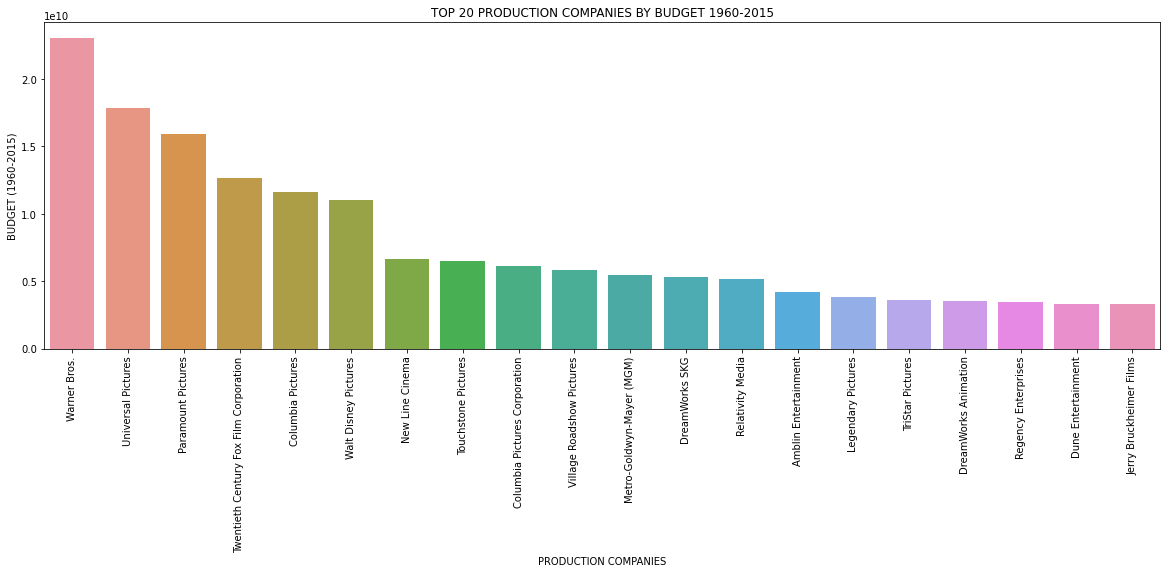

<Figure size 432x288 with 0 Axes>

In [56]:
#Selecting the top 20 companies based on budget
Top_20_Companies_by_budget = Budget_production_company_1960_2015.iloc[:20] #.rename(columns={"Total":"Total Budget (1960-2015)"}).iloc[:20]

# Plotting a bar plot for Top 20 companies based on budget generated
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_20_Companies_by_budget, x=Top_20_Companies_by_budget.index,y=Top_20_Companies_by_budget.Total,  ax= ax)
g.set_xticklabels(labels= list(Top_20_Companies_by_budget.index),rotation = 90)
ax.set_title("TOP 20 PRODUCTION COMPANIES BY BUDGET 1960-2015")
ax.set_xlabel("PRODUCTION COMPANIES")
ax.set_ylabel("BUDGET (1960-2015)")
plt.show()
plt.clf()

### What are the most popular production companies

In [57]:
# Aggreating the popularity of movies by their production companies
Popularity_production_company_1960_2015 = accumulation_by_genre_and_year(1, "production_companies")

In [58]:
Popularity_production_company_1960_2015.head(10)

Total
Warner Bros.                            516.284008
Universal Pictures                      414.551384
Paramount Pictures                      354.716715
Twentieth Century Fox Film Corporation  312.911386
Columbia Pictures                       245.501400
Walt Disney Pictures                    235.114942
New Line Cinema                         209.295462
Legendary Pictures                      153.658550
Village Roadshow Pictures               148.821838
Relativity Media                        135.624905

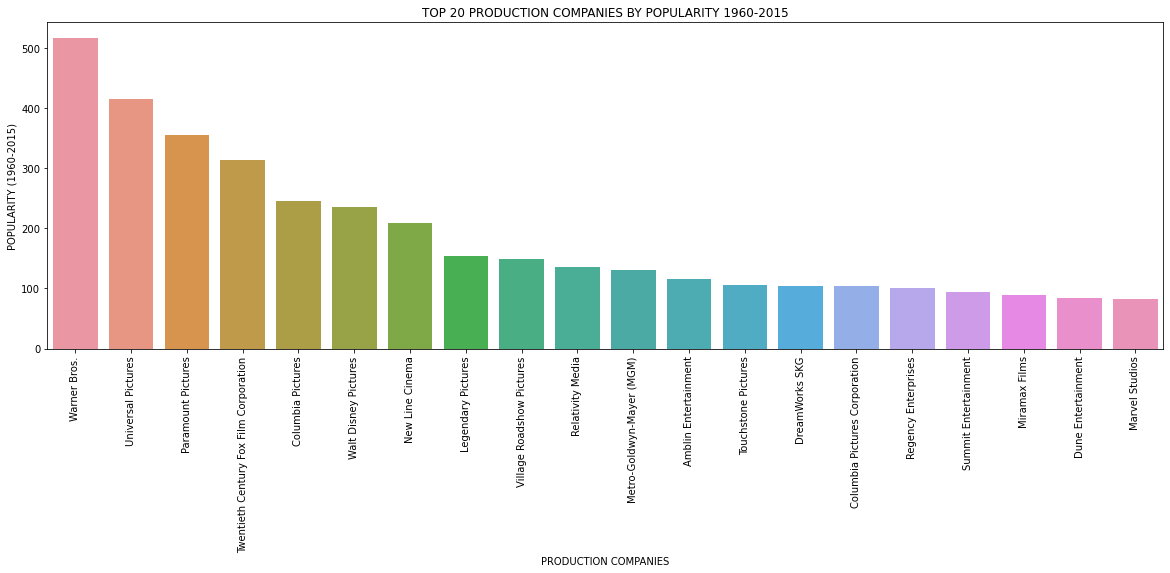

<Figure size 432x288 with 0 Axes>

In [59]:
#Selecting the top 20 companies based on popularity
Top_20_Companies_by_populariy = Popularity_production_company_1960_2015.iloc[:20] #.rename(columns={"Total":"Total Budget (1960-2015)"}).iloc[:20]

# Plotting a bar plot for Top 20 companies based on popularity
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_20_Companies_by_populariy, x=Top_20_Companies_by_populariy.index,y=Top_20_Companies_by_populariy.Total,  ax= ax)
g.set_xticklabels(labels= list(Top_20_Companies_by_populariy.index),rotation = 90)
ax.set_title("TOP 20 PRODUCTION COMPANIES BY POPULARITY 1960-2015")
ax.set_xlabel("PRODUCTION COMPANIES")
ax.set_ylabel("POPULARITY (1960-2015)")
plt.show()
plt.clf()

### What are the most voted companies

In [60]:
# Aggreating the vote count of movies by their production companies
Vote_count_production_company_1960_2015 = accumulation_by_genre_and_year(-6, "production_companies")

In [61]:
Vote_count_production_company_1960_2015.head()

Total
Warner Bros.                            266143
Universal Pictures                      199387
Paramount Pictures                      170223
Twentieth Century Fox Film Corporation  167433
Columbia Pictures                       133581

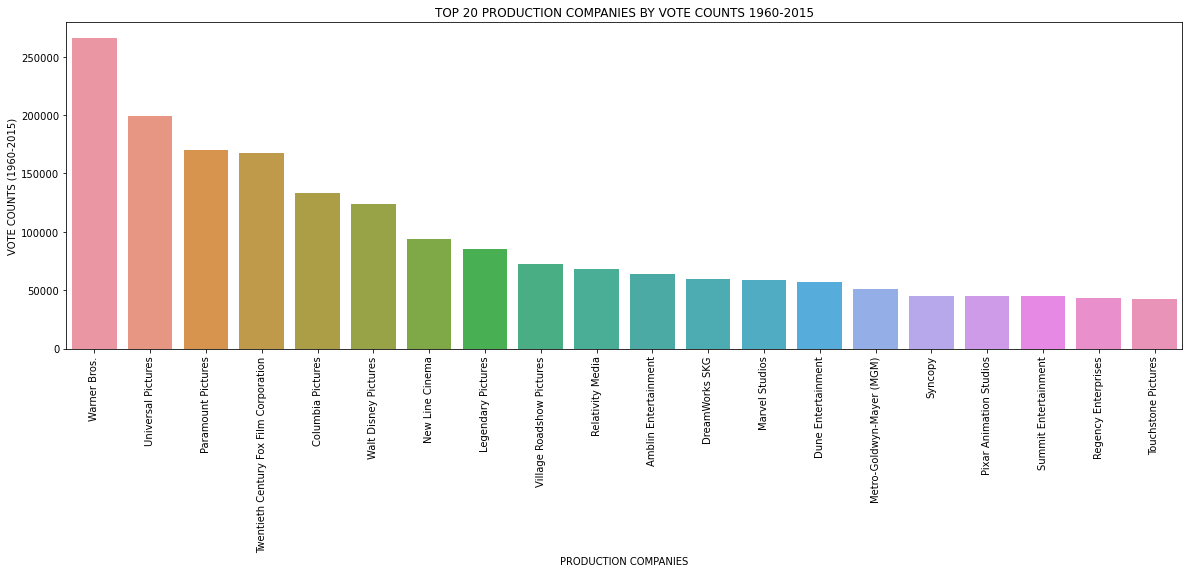

<Figure size 432x288 with 0 Axes>

In [62]:
#Selecting the top 20 companies based on vote count
Top_20_Companies_by_vote_count = Vote_count_production_company_1960_2015.iloc[:20]

# Plotting a bar plot for Top 20 companies based on vote count
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_20_Companies_by_vote_count, x=Top_20_Companies_by_vote_count.index,y=Top_20_Companies_by_vote_count.Total,  ax= ax)
g.set_xticklabels(labels= list(Top_20_Companies_by_vote_count.index),rotation = 90)
ax.set_title("TOP 20 PRODUCTION COMPANIES BY VOTE COUNTS 1960-2015")
ax.set_xlabel("PRODUCTION COMPANIES")
ax.set_ylabel("VOTE COUNTS (1960-2015)")
plt.show()
plt.clf()

Production companies that had high budget for movies, were most popular and most voted genereated the most revenues

<a id='conclusions'></a>
## Conclusions

The revenue Generated by movies have increased over the years, peaking in 2015. Movies productio has eveolved as technology advances, Productions companies have come, thrived and became inexistent, others have evolved with the trend. The goal of a business is to maximize revenue and the aim of production companies is to produve high revenue generating movies. What would make a movie likely to generate high revenue?. Movies produced by popular companies such as Warner Bros., Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation, Columbia Pictures, Walt Disney Pictures, New Line Cinema, Legendary Pictures, Village Roadshow Pictures, Relativity Media, etc, with high budgets and genres such as Actions, adventures, Scientific Fiction, Thriller, Drama and Comedy, with average rating above 5.5, runtime of atleast 110 are very likely to become high revenue generating movies. 

### What would make a movie likely to generate high revenue?

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

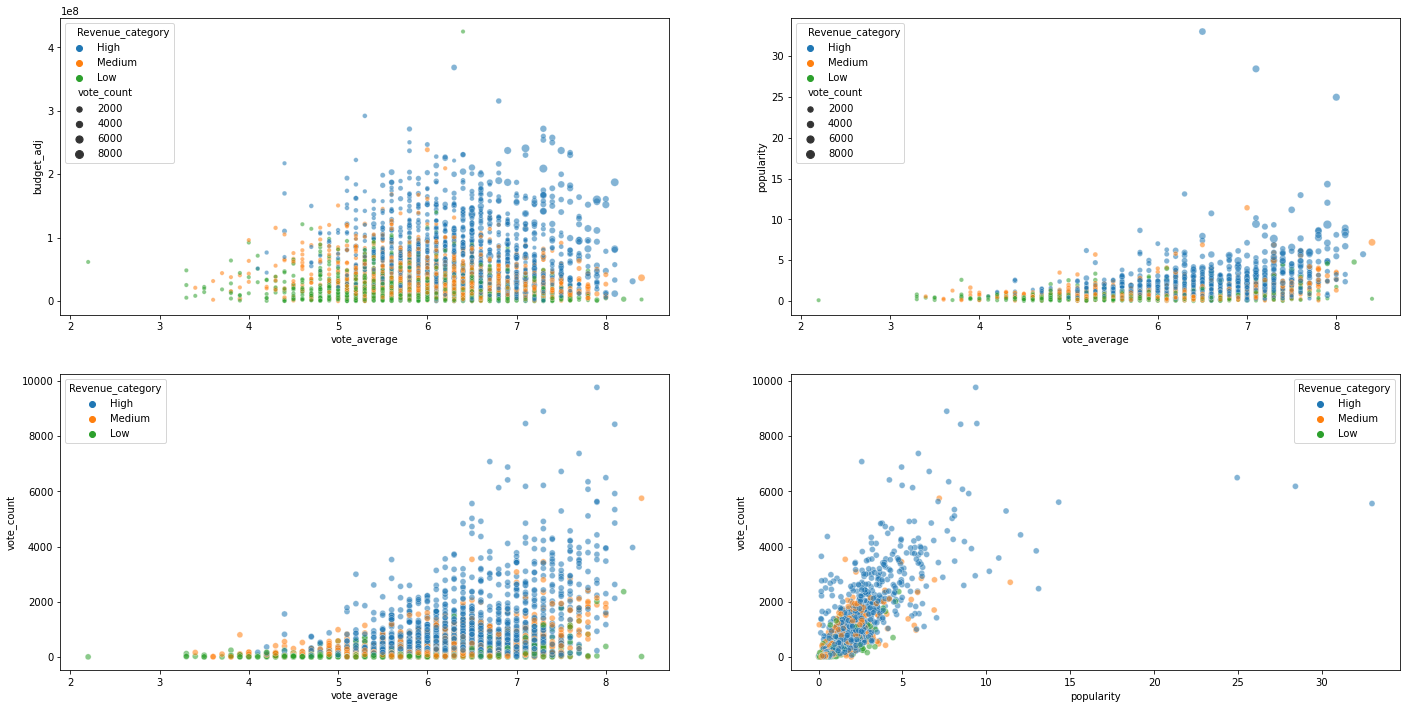

In [63]:
fig, ax = plt.subplots(2,2, figsize=(24,12))
sns.scatterplot(data=movies, y="budget_adj", x="vote_average", size="vote_count", hue="Revenue_category", ax=ax[0,0], alpha = 0.55)
sns.scatterplot(data=movies, y="popularity", x="vote_average", size="vote_count", hue="Revenue_category", ax=ax[0,1], alpha = 0.55)
sns.scatterplot(data=movies, y="vote_count", x="vote_average", hue="Revenue_category", ax=ax[1,0], alpha = 0.55)
sns.scatterplot(data=movies, y="vote_count", x="popularity", hue="Revenue_category", ax=ax[1,1], alpha = 0.55)

### LIMITATIONS
Variables like Revenue, Budget and run time had no units. There was no way to valiadte the revenue and the analysis was done on the assumption that the revenue and budget of all the movies are of the same currency. It was also assumed that the minum rvenue generated by a moie is 1000, 